# Wk3_Exercises_self_study (with solutions)

Before you start, first import the pandas, NumPy, matplotlib, seaborn, SciPy and statsmodels libraries, for example as follows:
```python
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

%matplotlib inline
```

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

%matplotlib inline

__Q1:__ Define a function ('calculate_summary_stats') that calculates and returns five basic summary statistics (mean, standard deviation, median, minimum and maximum) of all values in an array. Next, create an array ('arr_10') by manually entering the following values in NumPy's `array()` function: [1, 1, 1, 2, 2, 3, 3, 4, 5, 5]. Then perform the following operations: (1) call the function on the array, and (2) (in a separate cell) use `f-strings` to print the following statement: "The mean and median of this array are respectively: MEAN and MEDIAN.". Use calling the function to fill in the MEAN and MEDIAN in this statement.

In [2]:
# Define the function, create the array, and call the function

def calculate_summary_stats(arr):
    return np.mean(arr), np.std(arr), np.median(arr), np.min(arr), np.max(arr)

arr_10 = np.array([1, 1, 1, 2, 2, 3, 3, 4, 5, 5])
calculate_summary_stats(arr_10)

(2.7, 1.4866068747318506, 2.5, 1, 5)

In [3]:
# Print the sentence (by calling the function)

print(f"The mean and median of this array are respectively: {calculate_summary_stats(arr_10)[0]} and \
{calculate_summary_stats(arr_10)[2]}.")

The mean and median of this array are respectively: 2.7 and 2.5.


__Q2:__ An important skill for a data analyst is being able to choose the most appropriate statistical test for analyzing a research question. For each of the following four research questions, choose the most appropriate bivariate statistical test, assuming that the underlying assumptions of this test are met: (a) Is there a difference in JIT usage between users and non-users of ABC?; (b) Is there a difference in organizational performance (measured as return on sales) between users and non-users of ABC?; (c) Is there a difference in organizational performance (measured as return on sales) for 2020 between firms that are listed as Blue chips (Segment A), Midcaps (Segment B), and Small caps (Segment C) at the 	Amsterdam Stock Exchange?; and (d) Is there a difference in disclosure of sales per segment (i.e., product group) in the annual reports of 2020 between firms that have more and firms that have less than 10.000 employees? (The correct answers are provided later in this document.)

Data scientists regularly use a method called 'A/B testing'. As explained on Wikipedia, "A/B tests consist of a randomized experiment with two variants, A and B. It includes application of statistical hypothesis testing or "two-sample hypothesis testing" as used in the field of statistics. A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B, and determining which of the two variants is more effective."

Suppose there is an e-commerce company that wants to make some changes in its newsletter format to increase the traffic on its website. It takes the original newsletter and marks it A, and makes some changes in the language of A and calls it B. Both newsletters are otherwise the same in color, headlines, and format. As a data scientist, you are asked to test which newsletter brings higher traffic on the website. That is, you are asked to test whether (as hypothesized) the daily conversion rate of customers who receive newsletter B is higher than the daily conversion rate of customers who receive newsletter A.

For this experiment, you randomly select 1000 customers, and randomly assign each of these customers to either the control group or the treatment group, where the control group is the one that will receive newsletter A and the treatment group is the one that will receive newsletter B. Next, for a period of 30 days, you calculate the daily conversion rates for both groups.

__Q3:__ Use the `read_csv()` method to import the CSV file 'ab_test.csv' as a pandas DataFrame ('df_ab'). Next, explore this dataset using (at least) the `head()` and `info()` methods.

__NOTE:__ The dataset for the exercises about A/B testing is taken from Analytics Vidhya.

In [4]:
# Import the data

df_ab = pd.read_csv("data/ab_test.csv")
df_ab.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


In [5]:
# Display general information

df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           30 non-null     int64  
 1   Conversion_A  30 non-null     float64
 2   Conversion_B  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


__Q4:__ Use the `describe()` method to display summary statistics for the 'Conversion_A' and 'Conversion_B' variables. Use the `round()` method to round the numbers to three digits after the decimal, and the `transpose()` method (or `T`) to transpose the displayed table.

In [6]:
# Display summary statistics

df_ab[['Conversion_A', 'Conversion_B']].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Conversion_A,30.0,0.162,0.036,0.10,0.132,0.165,0.188,0.23
Conversion_B,30.0,0.193,0.027,0.15,0.180,0.190,0.200,0.27


__Q5:__ Use the t-test for two independent samples to test whether (as hypothesized) the conversion rate of customers who receive newsletter B is higher than the conversion rate of customers who receive newsletter A.

In [7]:
# Use the t-test for two independent samples

stats.ttest_ind(df_ab.Conversion_A, df_ab.Conversion_B, equal_var=True)

Ttest_indResult(statistic=-3.787367930919289, pvalue=0.00036379601282876257)

__Q6:__ Use the Welch's t-test to test whether (as hypothesized) the conversion rate of customers who receive newsletter B is higher than the conversion rate of customers who receive newsletter A. Would you draw the same conclusion about whether or not to reject the null hypothesis as you would based on the t-test for two independent samples?

In [8]:
# Use the Welch's t-test

stats.ttest_ind(df_ab.Conversion_A, df_ab.Conversion_B, equal_var=False)

Ttest_indResult(statistic=-3.78736793091929, pvalue=0.00038453573945864804)

__Q7:__ Use the Mann-Whitney test to test whether (as hypothesized) the conversion rate of customers who receive newsletter B is higher than the conversion rate of customers who receive newsletter A. Would you draw the same conclusion about whether or not to reject the null hypothesis as you would based on the t-test for two independent samples?

In [9]:
# Use the Mann-Whitney test

stats.mannwhitneyu(df_ab.Conversion_A, df_ab.Conversion_B)

MannwhitneyuResult(statistic=235.0, pvalue=0.0014033058361468222)

__Q8:__ Use the `read_csv()` method to import the CSV file 'expenditures_adj.csv' as a pandas DataFrame ('df_exp'). Next, explore this dataset using (at least) the `head()`, `info()` and `describe()` methods.

In [10]:
# Import the data

df_exp = pd.read_csv('data/expenditures_adj.csv')
df_exp.head()

,exp_no,employee_no,date,amount
0,E00001,Emp0013,2020-01-03,586
1,E00002,Emp0016,2020-01-04,289
2,E00003,Emp0005,2020-01-05,73
3,E00004,Emp0004,2020-01-07,118
4,E00005,Emp0008,2020-01-07,97


In [11]:
# Display general information

df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   exp_no       331 non-null    object
 1   employee_no  331 non-null    object
 2   date         331 non-null    object
 3   amount       331 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.5+ KB


In [12]:
# Display summary statistics

df_exp.describe()

,amount
count,331.000000
mean,639.767372
std,296.709352
min,13.000000
25%,476.500000
50%,523.000000
75%,875.500000
max,1602.000000


__Q9:__ Create a histogram of the 'amount' variable using 10 bins. Label the x-axis ('Amounts'), label the y-axis ('Frequency') and give the plot a title ('Frequency distribution of the expenditure amounts'). Next, also create this histogram using respectively 5 bins and 20 bins, and compare the three histograms. Which one do you think is the best representation of the data?

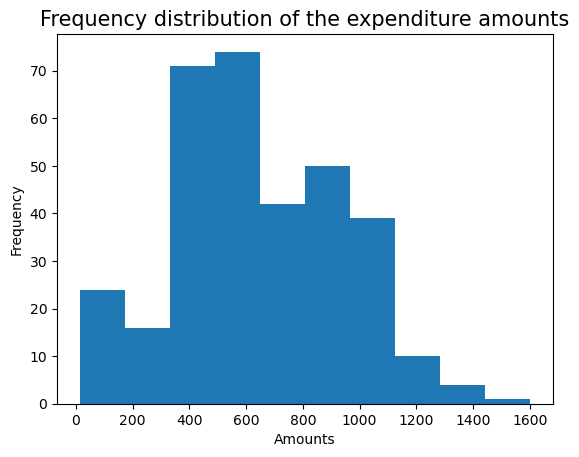

In [13]:
# Display the histograms of the 'amount' variable

plt.hist(df_exp['amount'], bins=10)
plt.xlabel('Amounts')
plt.ylabel('Frequency')
plt.title("Frequency distribution of the expenditure amounts", fontsize=15);

#plt.hist(df_exp['amount'], bins=5);
#plt.hist(df_exp['amount'], bins=20);

__Q10:__ Use the following Python code to analyze whether the frequency distribution of the 'amount' variable is consistent with a uniform distribution or not, when focussing on the last digit of the values of this variable:
```python
obs = df_exp['amount']

#Create a list of the last digit of the amounts
obs = [num % 10 for num in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(0, 10)}
for num in obs:
    dict1[num] += 1

#Convert the dictionary to a list
obs = list(dict1.values())

#Print the observed frequencies
print(obs)

#Test for differences using the one-sample Chi-Square test
stats.chisquare(obs)
```

Next, adapt this Python code such that it does not only perform the calculations and provides the data that are necessary for the one-sample Chi-Square test, but also those that are necessary for the graphical analysis (see the next question).

__NOTE:__ Consult the Wk3_Notebook when doing this exercise!

In [14]:
# Provided Python code to statistically analyze consistency with uniform distribution (last digit)
obs = df_exp['amount']

#Create a list of the last digit of the amounts
obs = [num % 10 for num in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(0, 10)}
for num in obs:
    dict1[num] += 1

#Convert the dictionary to a list
obs = list(dict1.values())

#Print the observed frequencies
print(obs)

#Test for differences using the one-sample Chi-Square test
stats.chisquare(obs)

[37, 35, 35, 38, 29, 30, 27, 34, 36, 30]


Power_divergenceResult(statistic=3.894259818731117, pvalue=0.9182331212646249)

In [15]:
# Adapted Python code to statistically analyze consistency with uniform distribution (last digit)
obs = df_exp['amount']

#Create a list of the last digit of the amounts
obs = [num % 10 for num in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(0, 10)}
for num in obs:
    dict1[num] += 1

#Calculate the number of observations and assign it to a variable
n = len(obs)

#Create a dictionary with the expected frequencies
dict2 = {x: round(n * 0.1, 1) for x in range(0, 10)}

#Convert the dictionaries to lists
obs = list(dict1.values())
exp = list(dict2.values())
x = list(dict1.keys())

#Print the observed and expected frequencies
print(obs)
print(exp)

#Test for differences using the one-sample Chi-Square test
stats.chisquare(obs, f_exp=exp)

[37, 35, 35, 38, 29, 30, 27, 34, 36, 30]
[33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1]


Power_divergenceResult(statistic=3.894259818731117, pvalue=0.9182331212646249)

__Q11:__ Create a figure that shows both the observed and expected frequencies as lines in one plot. Label the x-axis ('Last digit'), label the y-axis ('Frequency') and give the plot a title ('Observed vs. expected frequencies (uniform distribution)'). Interpret the graph!

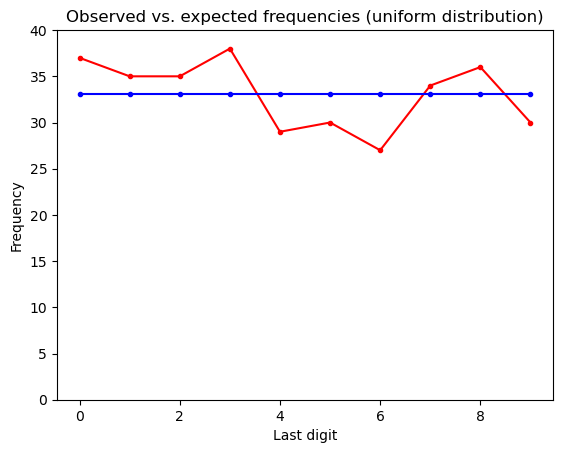

In [16]:
# Graphically analyze consistency with uniform distribution (last digit)

plt.plot(x, obs, c='r', marker= '.')
plt.plot(x, exp, c='b', marker= '.')
plt.ylim(0, 40)
plt.xlabel('Last digit')
plt.ylabel('Frequency')
plt.title("Observed vs. expected frequencies (uniform distribution)");

__Q12:__ Analyze whether the frequency distribution of the 'amount' variable is consistent with Benford's law or not, when focussing on the first digit of the values of this variable.

__NOTE:__ Consult the Wk3_Notebook when doing this exercise!

In [17]:
# Statistically analyze consistency with Benford's law (first digit)
import math

obs = df_exp['amount']

#Create a list of the first two digits of the amounts
def first_digit(num):
    return int(str(num)[0])
obs = [first_digit(n) for n in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(1, 10)}
for num in obs:
    dict1[num] += 1

#Calculate the number of observations and assign it to a variable
n = len(obs)

#Create a dictionary with the expected frequencies    
dict2 = {x: round(n * math.log10(1+(1/x)), 0) for x in range(1, 10)}

#Convert the dictionaries to lists
obs = list(dict1.values())
exp = list(dict2.values())
x = list(dict2.keys())

#Print the observed and expected frequencies
print(obs)
print(exp)

#Normalize the data such that the observed and expected frequencies have the same sum
if sum(obs) != sum(exp):
    exp = [i * (sum(obs)/sum(exp)) for i in exp]

#Test for differences using the one-sample Chi-Square test
stats.chisquare(obs, f_exp=exp)

[49, 13, 8, 95, 41, 20, 28, 32, 45]
[100.0, 58.0, 41.0, 32.0, 26.0, 22.0, 19.0, 17.0, 15.0]


Power_divergenceResult(statistic=296.9472645625782, pvalue=1.8378999966810903e-59)

__Q13:__ Create a figure that shows both the observed and expected frequencies as lines in one plot. Label the x-axis ('First digit'), label the y-axis ('Frequency') and give the plot a title ('Observed vs. expected frequencies (Benford's law)'). Interpret the graph, also by comparing it with the graph that was created during one of the lectures based on the first two digits! (The correct answers for Q2 are: (a) chi-square test of independence; (b) t-test for two independent samples; (c) one-way ANOVA test; and (d) chi-square test of independence.)

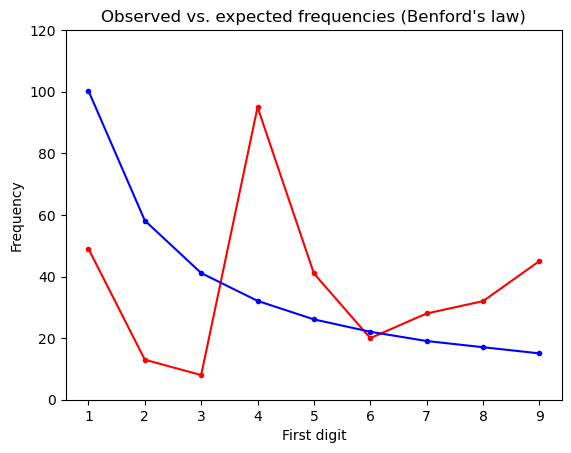

In [18]:
# Graphically analyze consistency with Benford's law (first digit)

plt.plot(x, obs, c='r', marker= '.')
plt.plot(x, exp, c='b', marker= '.')
plt.ylim(0, 120)

plt.xlabel('First digit')
plt.ylabel('Frequency')
plt.title("Observed vs. expected frequencies (Benford's law)");